In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython import display

plt.rcParams["axes.grid"] = True

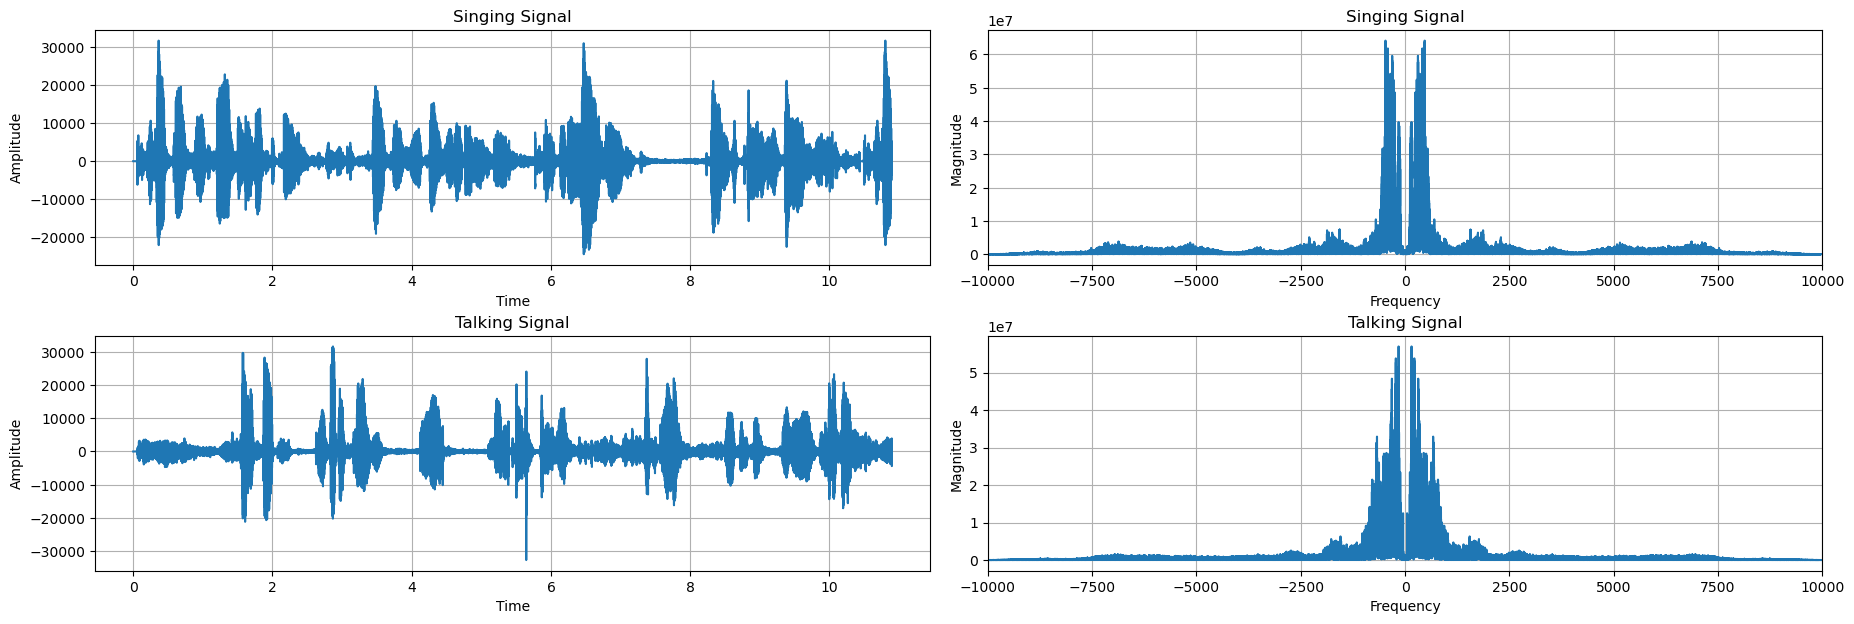

In [2]:
rate1, d1_t = wavfile.read("./data/audio-1.wav")
rate2, d2_t = wavfile.read("./data/audio-2.wav")

display.display(display.Audio(data=d1_t, rate=rate1))
display.display(display.Audio(data=d2_t, rate=rate2))

d1_t = np.resize(d1_t, len(d2_t))

t = np.linspace(0, len(d1_t) / rate1, num=len(d1_t))
f = np.linspace(-rate2 / 2, rate2 / 2, num=len(d2_t))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))
fig.tight_layout(h_pad=3)

axs[0, 0].plot(t, d1_t)
axs[0, 0].set_title("Singing Signal")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

D1_f = np.fft.fftshift(np.fft.fft(d1_t))


axs[0, 1].plot(f, np.abs(D1_f))
axs[0, 1].set_title("Singing Signal")
axs[0, 1].set_xlabel("Frequency")
axs[0, 1].set_ylabel("Magnitude")
axs[0, 1].set_xlim(-10e3, 10e3)

axs[1, 0].plot(t, d2_t)
axs[1, 0].set_title("Talking Signal")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Amplitude")

D2_f = np.fft.fftshift(np.fft.fft(d2_t))

axs[1, 1].plot(f, np.abs(D2_f))
axs[1, 1].set_title("Talking Signal")
axs[1, 1].set_xlabel("Frequency")
axs[1, 1].set_ylabel("Magnitude")
axs[1, 1].set_xlim(-10e3, 10e3)

plt.show()

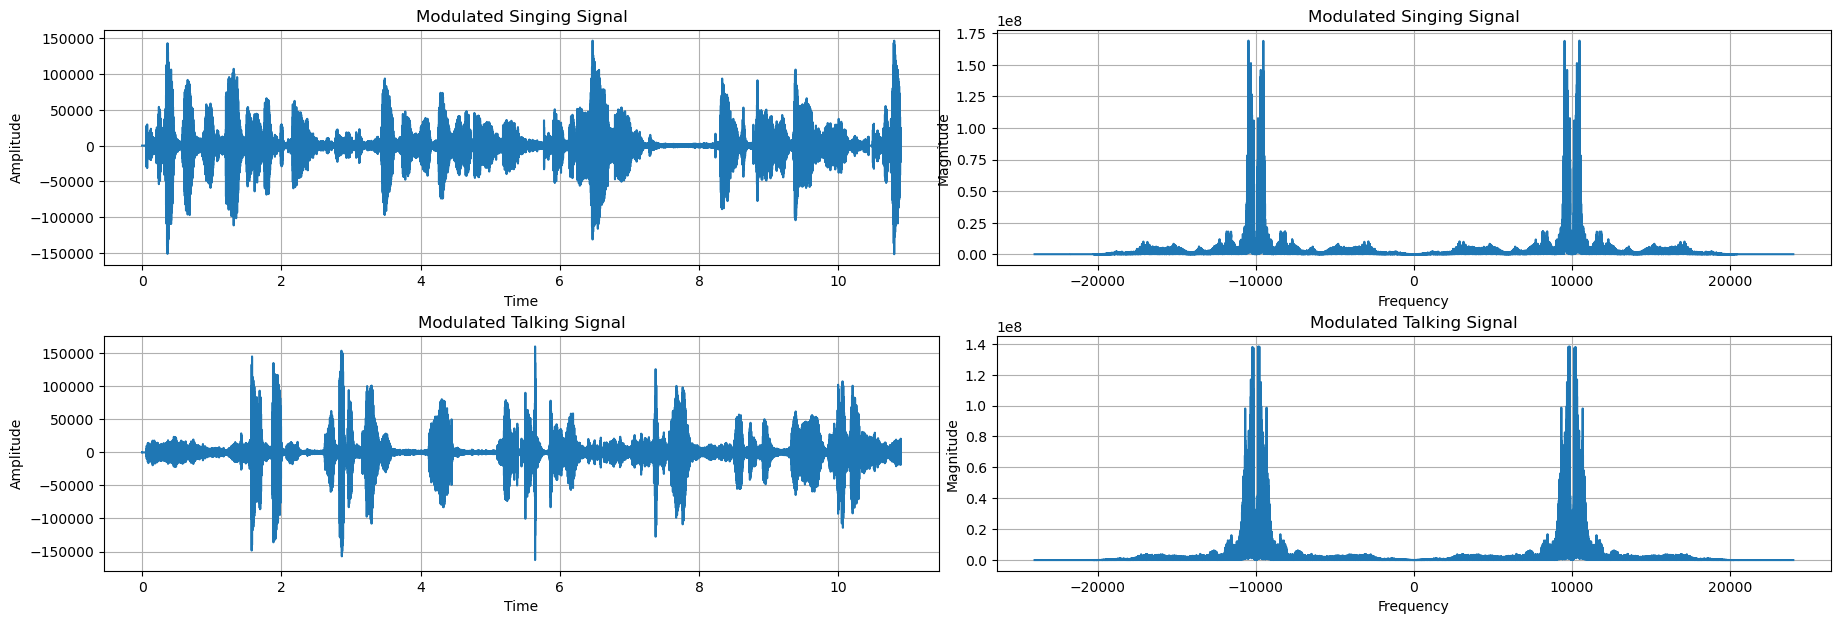

In [3]:
fc = 10e3
A1 = 5
A2 = 5

c1_t = A1 * np.cos(2 * np.pi * fc * t)
c2_t = -A2 * np.sin(2 * np.pi * fc * t)

m1_t = d1_t * c1_t
m2_t = d2_t * c2_t

display.display(display.Audio(data=m1_t, rate=rate1))
display.display(display.Audio(data=m2_t, rate=rate2))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))
fig.tight_layout(h_pad=3)

axs[0, 0].plot(t, m1_t)
axs[0, 0].set_title("Modulated Singing Signal")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

M1_f = np.fft.fftshift(np.fft.fft(m1_t))

axs[0, 1].plot(f, np.abs(M1_f))
axs[0, 1].set_title("Modulated Singing Signal")
axs[0, 1].set_xlabel("Frequency")
axs[0, 1].set_ylabel("Magnitude")

axs[1, 0].plot(t, m2_t)
axs[1, 0].set_title("Modulated Talking Signal")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Amplitude")

M2_f = np.fft.fftshift(np.fft.fft(m2_t))

axs[1, 1].plot(f, np.abs(M2_f))
axs[1, 1].set_title("Modulated Talking Signal")
axs[1, 1].set_xlabel("Frequency")
axs[1, 1].set_ylabel("Magnitude")

plt.show()

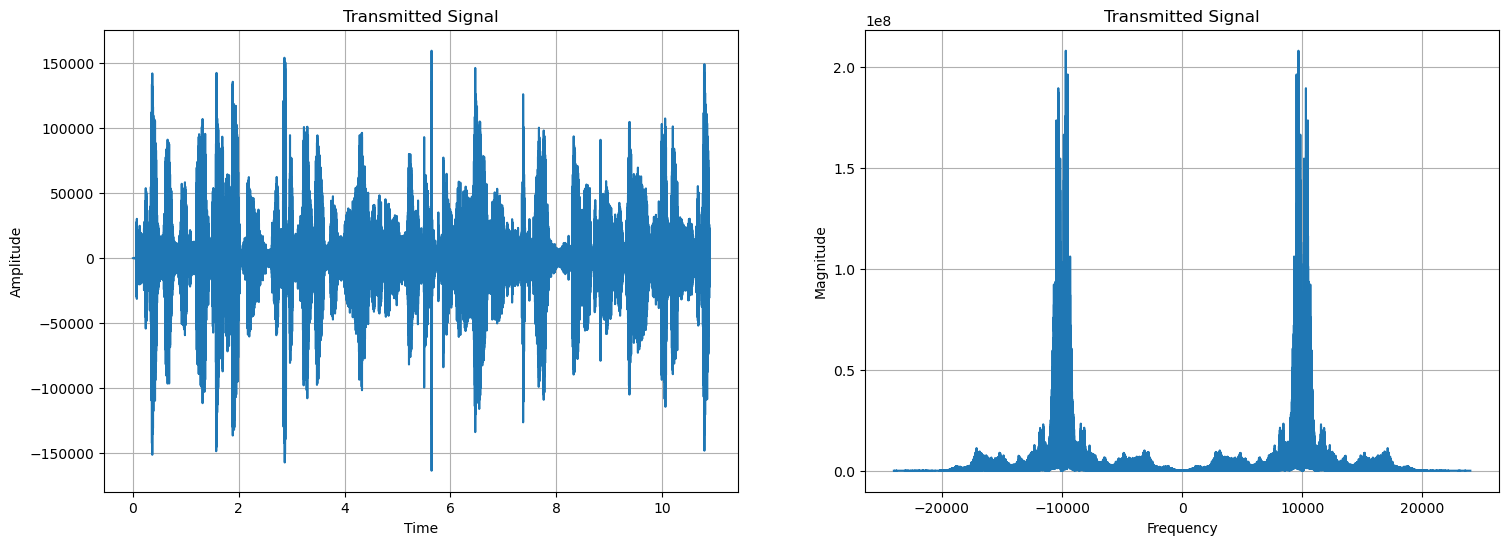

In [4]:
y_t = m1_t + m2_t

display.display(display.Audio(data=y_t, rate=rate1))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axs[0].plot(t, y_t)
axs[0].set_title("Transmitted Signal")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Amplitude")

Y_f = np.fft.fftshift(np.fft.fft(y_t))

axs[1].plot(f, np.abs(Y_f))
axs[1].set_title("Transmitted Signal")
axs[1].set_xlabel("Frequency")
axs[1].set_ylabel("Magnitude")

plt.show()

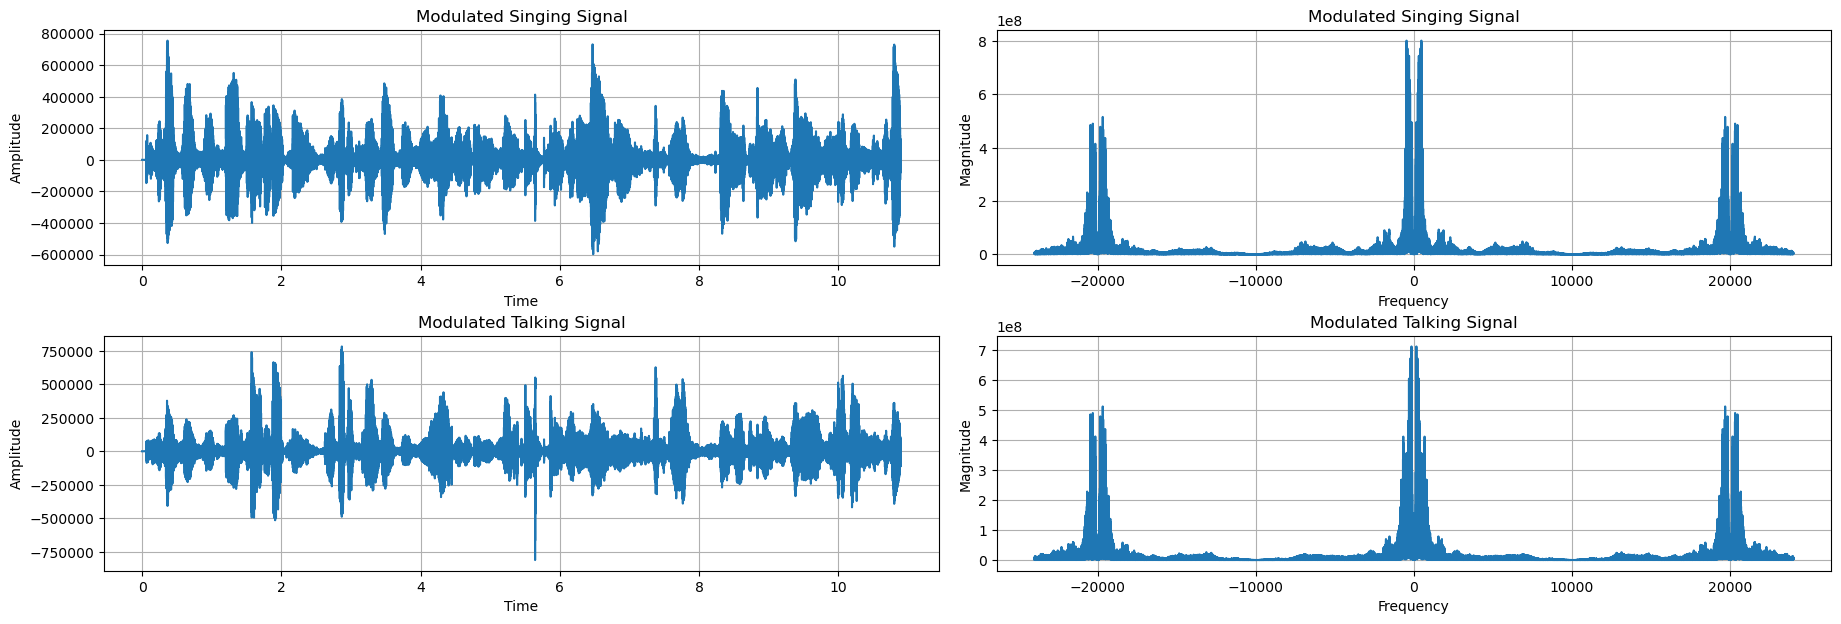

In [5]:
x1_t = y_t * c1_t
x2_t = y_t * c2_t

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))
fig.tight_layout(h_pad=3)

axs[0, 0].plot(t, x1_t)
axs[0, 0].set_title("Modulated Singing Signal")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

X1_f = np.fft.fftshift(np.fft.fft(x1_t))

axs[0, 1].plot(f, np.abs(X1_f))
axs[0, 1].set_title("Modulated Singing Signal")
axs[0, 1].set_xlabel("Frequency")
axs[0, 1].set_ylabel("Magnitude")

axs[1, 0].plot(t, x2_t)
axs[1, 0].set_title("Modulated Talking Signal")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Amplitude")

X2_f = np.fft.fftshift(np.fft.fft(x2_t))

axs[1, 1].plot(f, np.abs(X2_f))
axs[1, 1].set_title("Modulated Talking Signal")
axs[1, 1].set_xlabel("Frequency")
axs[1, 1].set_ylabel("Magnitude")

plt.show()

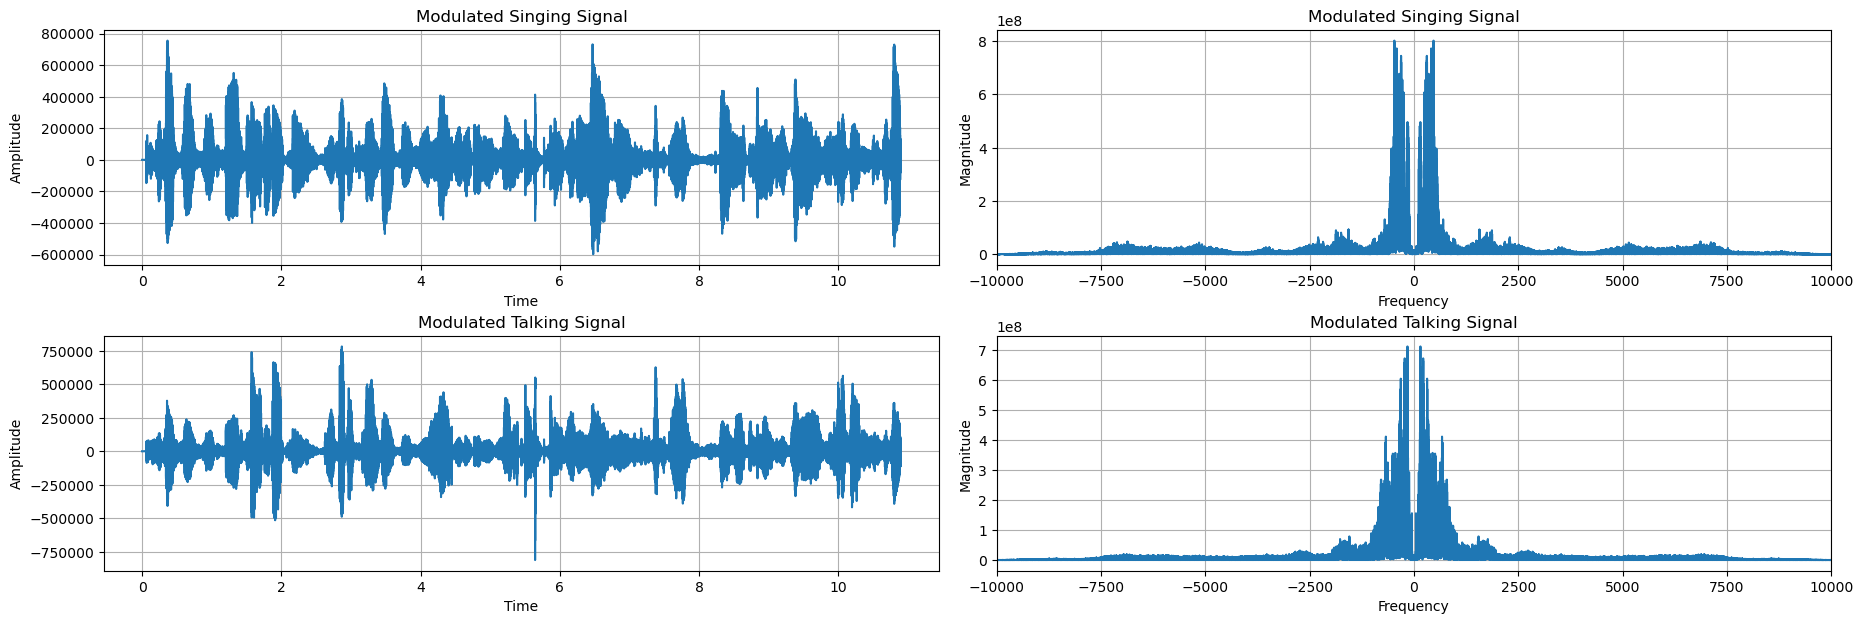

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 6))
fig.tight_layout(h_pad=3)

axs[0, 0].plot(t, x1_t)
axs[0, 0].set_title("Modulated Singing Signal")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

X1_f = np.fft.fftshift(np.fft.fft(x1_t))

axs[0, 1].plot(f, np.abs(X1_f))
axs[0, 1].set_title("Modulated Singing Signal")
axs[0, 1].set_xlabel("Frequency")
axs[0, 1].set_ylabel("Magnitude")
axs[0, 1].set_xlim(-10e3, 10e3)

axs[1, 0].plot(t, x2_t)
axs[1, 0].set_title("Modulated Talking Signal")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Amplitude")

X2_f = np.fft.fftshift(np.fft.fft(x2_t))

axs[1, 1].plot(f, np.abs(X2_f))
axs[1, 1].set_title("Modulated Talking Signal")
axs[1, 1].set_xlabel("Frequency")
axs[1, 1].set_ylabel("Magnitude")
axs[1, 1].set_xlim(-10e3, 10e3)

plt.show()